In [49]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import linregress
from scipy.optimize import curve_fit
import random as r
from pprint import pprint as ppr

In [29]:
initdf = pd.read_csv('cpidata_whole.csv')
initdf.head()

datelist = [initdf['date'][i].split('/') for i in range(len(initdf))]
initdf['year'] = [int(datelist[i][2]) for i in range(len(initdf))]

In [30]:
# These will be important later
list1 = ['dairyinf', 'mpfeinf', 'fvinf']
list2 = ['dairycpi', 'mpfecpi', 'fvcpi']

# monthly inflation values
for i in range(len(list1)):
    initdf[list1[i]] = initdf[list2[i]].pct_change(periods=1)

# Removes empty first row of pct change values
initdf.dropna(inplace=True)
initdf.reset_index()
initdf

# This can be changed to any years that scratch your fancy, the loop will
# automatically grab that year plus 4 more. List MUST BE INTEGERS or loop
# will not function
filterlist = [r.randint(1967,2019) for i in range(10)]
filterlist.append(2020)
summarydict = {}

In [31]:
currdf = initdf[(initdf['year'] >= 2010) & (initdf['year'] <= (2010 + 4))]
currdf.reset_index(drop=True, inplace = True)
currdf
years = currdf['year'].unique()
years

array([2010, 2011, 2012, 2013, 2014])

In [32]:
# Main loop
for year in filterlist:
    currdf = initdf[(initdf['year'] >= year) & (initdf['year'] <= (year + 4))]
    currdf.reset_index(drop=True, inplace = True)
    years = currdf['year'].unique()
    for year in years:
        # Percent Change for each category for the given years
        # Total percent change over the 5 year period, taken to mean 
        # average inflation over 5 year period
        percchangelist = [((currdf[list2[m]][int(len(currdf)-1)])-(currdf[list2[m]][0]))/(currdf[list2[m]][0]) for m in range(0,3)]
        # summary data for all 3 variables in the current year
        for i in range(len(list2)):
            summarydict[str(year)+list2[i]] = {'mean':round(float(currdf[list2[i]].mean()), 2),
                                'median':currdf[list2[i]].median(),
                                'mode':round(float(currdf[list2[i]].mode()[0]),2),
                                'standard error':round(float(currdf[list2[i]].sem()),2),
                                'percChange' : round(float(percchangelist[i]),2)}    # Percent Change in 
            
        # plotting the data for easier understanding, commented out just to save time for testing
        """n = 0
        for item in list1:
            print(f"Percent change over total period: {round(percchangelist[n],2)}%")
            fig, ax = plt.subplots()
            ax.plot(currdf['date'], currdf[item])
            ax.set_xticks(ax.get_xticks()[::2])
            fig.tight_layout()
            plt.xlabel(f'Date')
            plt.ylabel(f'% Change Inflation')
            plt.title(f'% Change Inflation from {year} to {year+4} for {item}')
            plt.xticks(fontsize = 5, rotation=90)
            plt.show()
            n += 1"""

ppr(summarydict)

{'1978dairycpi': {'mean': 88.83,
                  'median': 91.15,
                  'mode': 97.5,
                  'percChange': 0.39,
                  'standard error': 1.23},
 '1978fvcpi': {'mean': 83.74,
               'median': 81.6,
               'mode': 74.0,
               'percChange': 0.45,
               'standard error': 1.3},
 '1978mpfecpi': {'mean': 90.72,
                 'median': 91.6,
                 'mode': 87.9,
                 'percChange': 0.42,
                 'standard error': 1.04},
 '1979dairycpi': {'mean': 88.83,
                  'median': 91.15,
                  'mode': 97.5,
                  'percChange': 0.39,
                  'standard error': 1.23},
 '1979fvcpi': {'mean': 83.74,
               'median': 81.6,
               'mode': 74.0,
               'percChange': 0.45,
               'standard error': 1.3},
 '1979mpfecpi': {'mean': 90.72,
                 'median': 91.6,
                 'mode': 87.9,
                 'percChange': 0.42,
  

In [33]:
output = {}
for key, value in summarydict.items():
    output[key] = summarydict[key]['percChange']
outputdf = pd.DataFrame(output, ['PercChange'])
outputdf = outputdf.transpose()
sampledf = outputdf.sample(frac=0.5, random_state=11)
sampledf = sampledf.sort_index()
sampledf.reset_index(inplace=True)
sampledf.head()

,index,PercChange
0,1978fvcpi,0.45
1,1979fvcpi,0.45
2,1980dairycpi,0.39
3,1980fvcpi,0.45
4,1980mpfecpi,0.42


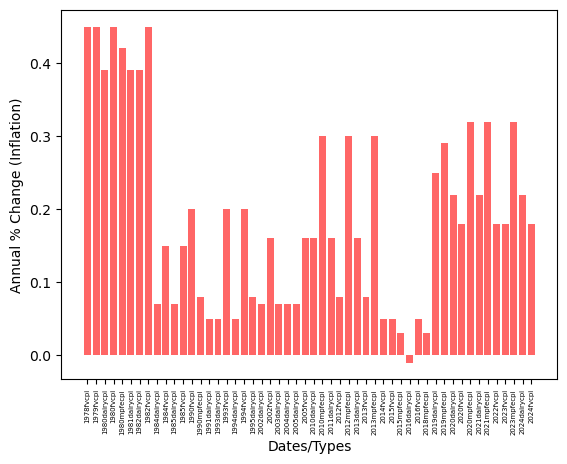

In [34]:
# Plot shows 5 year percent change values for different 5 year groups
plt.bar(sampledf['index'],sampledf['PercChange'], color = 'r', alpha = 0.6)
plt.xticks(fontsize=5, rotation=90)
plt.xlabel('Dates/Types')
plt.ylabel('Annual % Change (Inflation)')
plt.show()


In [35]:
inflationdf = pd.read_csv('inflation_annual.csv')
inflationdf.head()


,date,inflation
0,1/1/1967,2.772786
1,1/1/1968,4.271796
2,1/1/1969,5.462386
3,1/1/1970,5.838255
4,1/1/1971,4.292767


In [36]:
outputdf = outputdf.sort_index()
outputdf.reset_index(inplace=True)
outputdf.columns = ['date1', 'PercChange']
outputdf['date'] = pd.Series([])
outputdf

,date1,PercChange,date
0,1978dairycpi,0.39,NaN
1,1978fvcpi,0.45,NaN
2,1978mpfecpi,0.42,NaN
3,1979dairycpi,0.39,NaN
4,1979fvcpi,0.45,NaN
...,...,...,...
100,2023fvcpi,0.18,NaN
101,2023mpfecpi,0.32,NaN
102,2024dairycpi,0.22,NaN
103,2024fvcpi,0.18,NaN


In [37]:
print(outputdf['date1'][0][0:4])

1978


In [38]:
yearlist = []
for index, row in outputdf.iterrows():
    yearlist.append(row['date1'][0:4])
    outputdf.loc[index, 'date'] = yearlist[index]
    
    
outputdf
yeargroup = outputdf.groupby(outputdf['date'])
yeargroupdf = yeargroup.sum()
yeargroupdf['PercChange'] = round(yeargroupdf['PercChange']/3,2)
yeargroupdf['date1'] = list(yeargroupdf.index)
yeargroupdf.head()


,date1,PercChange
date,,
1978,1978,0.42
1979,1979,0.42
1980,1980,0.42
1981,1981,0.42
1982,1982,0.42


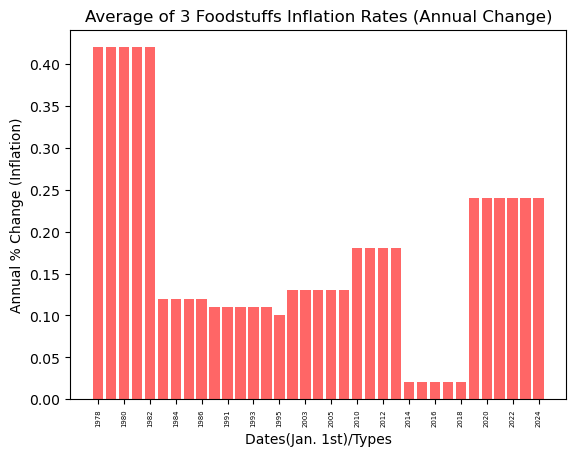

In [39]:
plt.bar(yeargroupdf['date1'], yeargroupdf['PercChange'], color = 'r', alpha = 0.6)
locs, labels = plt.xticks()
plt.xticks(locs[::2],labels[::2],fontsize=5, rotation=90)
plt.xlabel('Dates(Jan. 1st)/Types')
plt.ylabel('Annual % Change (Inflation)')
plt.title('Average of 3 Foodstuffs Inflation Rates (Annual Change)')
plt.show()

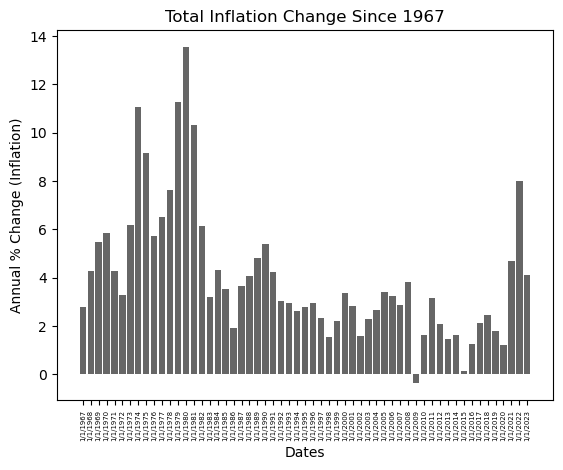

In [54]:
plt.bar(data=inflationdf,x='date',height='inflation', color = 'black', alpha = 0.6)
plt.xticks(fontsize=5, rotation=90)
plt.xlabel('Dates')
plt.ylabel('Annual % Change (Inflation)')
plt.title('Total Inflation Change Since 1967')
plt.show()

In [41]:
# initdf, inflationdf
initdf
newdf = initdf[['date','dairycpi','mpfecpi','fvcpi']]
annuallist = [i for i in newdf['date'] if ('1/1/' in i)&~('11/1/' in i)]
outputdict = {}

for index, row in newdf.iterrows():
    if row['date'] in annuallist:
        outputdict[f"{row['date']}"] = row[['dairycpi','mpfecpi','fvcpi']]

new2df = pd.DataFrame(outputdict)
new2df = new2df.transpose()
new2df.reset_index(inplace=True)
new2df.columns = ['date','dairycpi','mpfecpi','fvcpi']
mergedf = new2df.merge(inflationdf, on='date')
for item in list2:
    mergedf[list2] = mergedf[list2].astype(float)
for item in list2 + ['inflation']:
    mergedf[item] = round(mergedf[item],2)

mergedf[['dairycpi','mpfecpi','fvcpi']] = mergedf[['dairycpi','mpfecpi','fvcpi']].pct_change() * 100
mergedf.dropna(inplace=True)
mergedf.columns = ['date','dairyinf','mpfeinf','fvinf','inflation']
mergedf


C:\Users\leowh\AppData\Local\Temp\ipykernel_8512\371393209.py:4: DeprecationWarning: Bitwise inversion '~' on bool is deprecated and will be removed in Python 3.16. This returns the bitwise inversion of the underlying int object and is usually not what you expect from negating a bool. Use the 'not' operator for boolean negation or ~int(x) if you really want the bitwise inversion of the underlying int.
  annuallist = [i for i in newdf['date'] if ('1/1/' in i)&~('11/1/' in i)]


,date,dairyinf,mpfeinf,fvinf,inflation
1,1/1/1969,3.448276,6.332454,2.542373,5.46
2,1/1/1970,4.761905,12.406948,3.305785,5.84
3,1/1/1971,3.636364,-4.415011,-1.600000,4.29
4,1/1/1972,2.192982,5.311778,10.840108,3.27
5,1/1/1973,2.145923,14.473684,8.068460,6.18
6,1/1/1974,22.899160,24.521073,14.479638,11.05
7,1/1/1975,6.153846,-4.153846,9.486166,9.14
8,1/1/1976,8.373591,13.643660,5.776173,5.74
9,1/1/1977,1.783061,-6.497175,2.218430,6.50
10,1/1/1978,3.795620,5.135952,10.350584,7.63


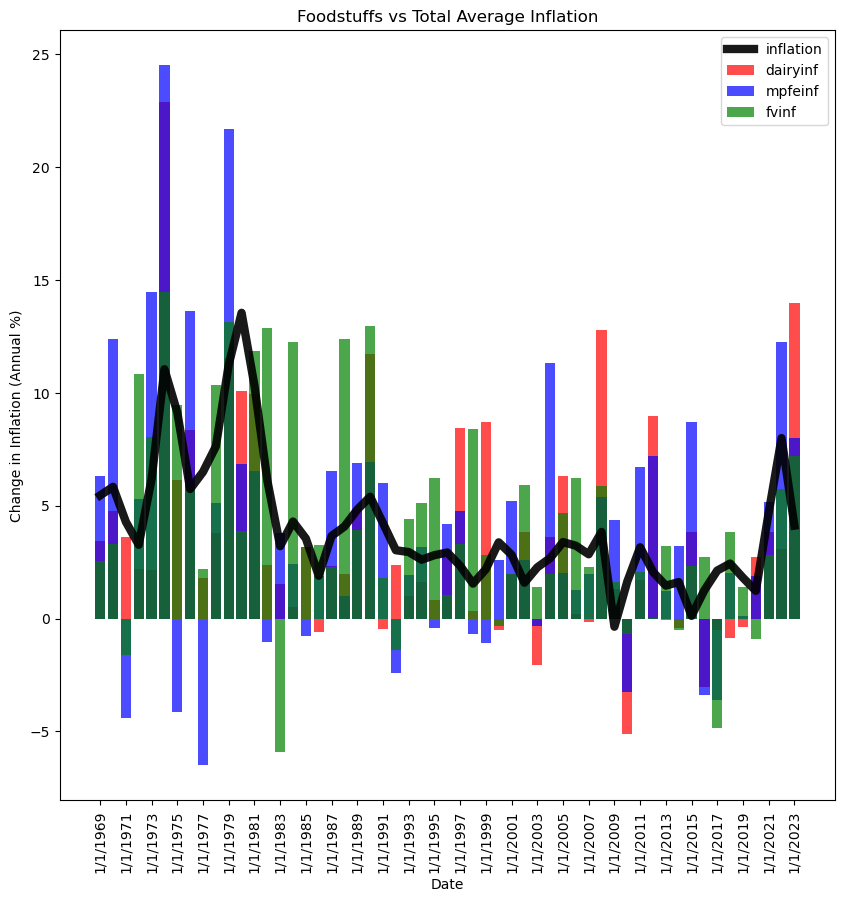

In [53]:
plt.figure(figsize=(10,10))
plt.bar(mergedf['date'], mergedf['dairyinf'], color = 'red', alpha=0.7)
plt.bar(mergedf['date'], mergedf['mpfeinf'], color = 'blue', alpha=0.7)
plt.bar(mergedf['date'], mergedf['fvinf'], color = 'green', alpha=0.7)
plt.plot(mergedf['date'], mergedf['inflation'], color = 'black', alpha=0.9, lw=6)
locs, labels = plt.xticks()
plt.xticks(locs[::2],labels[::2],fontsize=10, rotation=90)
labels = ['inflation','dairyinf','mpfeinf','fvinf']
plt.legend(labels = labels)
plt.xlabel('Date')
plt.ylabel('Change in Inflation (Annual %)')
plt.title('Foodstuffs vs Total Average Inflation')
plt.savefig('fs_v_tai.png')
plt.show()

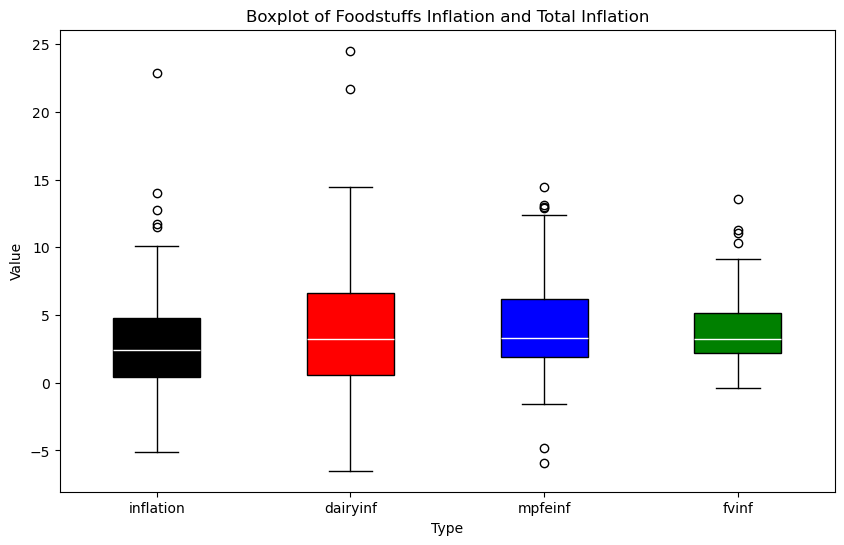

In [52]:
data = [mergedf['dairyinf'], mergedf['mpfeinf'], mergedf['fvinf'], mergedf['inflation']]
plt.figure(figsize=(10,6))
boxplot = plt.boxplot(data, patch_artist=True, tick_labels=labels)
colors = ['black', 'red', 'blue', 'green']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
for median in boxplot['medians']:
    median.set_color('white')
plt.title('Boxplot of Foodstuffs Inflation and Total Inflation')
plt.xlabel('Type')
plt.ylabel('Value')
plt.savefig('boxplot.png')
plt.show()

In [44]:
outputdict = {}
i = 0
for item in labels:
    q1 = mergedf[item].quantile(0.25)
    q3 = mergedf[item].quantile(0.75)
    iqr = q3 - q1
    outputdict[f"{labels[i]}"] = {'q1':round(float(q1),2),
                                  'q3':round(float(q3),2),
                                  'iqr':round(float(iqr),2)}
    i += 1
ppr(outputdict)

{'dairyinf': {'iqr': 4.38, 'q1': 0.42, 'q3': 4.8},
 'fvinf': {'iqr': 4.32, 'q1': 1.9, 'q3': 6.21},
 'inflation': {'iqr': 2.89, 'q1': 2.23, 'q3': 5.12},
 'mpfeinf': {'iqr': 6.06, 'q1': 0.56, 'q3': 6.63}}


In [45]:
ppr(outputdict)

{'dairyinf': {'iqr': 4.38, 'q1': 0.42, 'q3': 4.8},
 'fvinf': {'iqr': 4.32, 'q1': 1.9, 'q3': 6.21},
 'inflation': {'iqr': 2.89, 'q1': 2.23, 'q3': 5.12},
 'mpfeinf': {'iqr': 6.06, 'q1': 0.56, 'q3': 6.63}}


In [46]:
i = 0
outdict = {}
for key, val in outputdict.items():
    filterdf = mergedf[(mergedf[key]>(val['q3']+1.5*iqr))|(mergedf[key]<(val['q1']-1.5*iqr))]
    filterdf.reset_index(drop=True, inplace=True)
    outdict[key] = filterdf
yearlist = []
for key in outdict.keys():
    out = outdict[key]['date']
    yearlist.append(out)
outliers = []
for row in yearlist:
    for item in row:
        if item in outliers:
            pass
        else:
            outliers.append(item)

print(outliers)

['1/1/1980', '1/1/1974', '1/1/1979', '1/1/1990', '1/1/2008', '1/1/2023', '1/1/1973', '1/1/1976', '1/1/1977', '1/1/1982', '1/1/1983', '1/1/2017']


In [47]:
outlierdf = mergedf[mergedf['date'].isin(outliers)]
outlierdf.sort_values('date', inplace=True)
outlierdf
outlierdf.to_csv('outlier_inflation_years.csv')

# outlierdf contains data for all years in which the IQR test determined that 
# the values were outliers. 
# These years could be indicitave of several things:
#  - The beginning of a recession
#  - Shortage of supplies for a given industry

C:\Users\leowh\AppData\Local\Temp\ipykernel_8512\1039390718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierdf.sort_values('date', inplace=True)


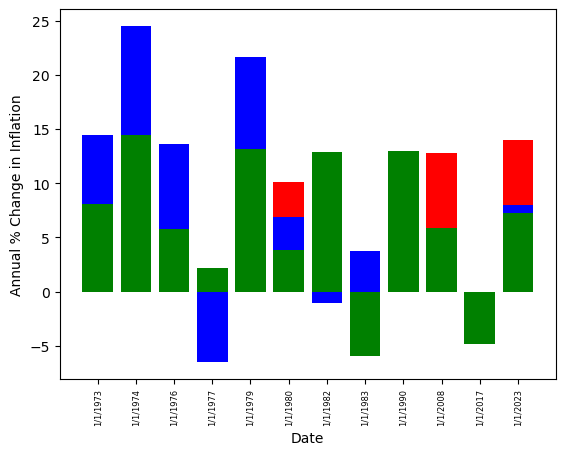

In [58]:
outliers = pd.read_csv('outlier_inflation_years.csv')
outliers
plt.bar(outliers['date'], outliers['dairyinf'], color = 'r')
plt.bar(outliers['date'], outliers['mpfeinf'], color = 'b')
plt.bar(outliers['date'], outliers['fvinf'], color = 'g')
plt.xticks(fontsize=6, rotation=90)
plt.xlabel('Date')
plt.ylabel('Annual % Change in Inflation')
plt.savefig('outliers.png')
plt.show()

In [51]:
#  data for three groups
group1 = mergedf['dairyinf']
group2 = mergedf['mpfeinf']
group3 = mergedf['fvinf']
group4 = mergedf['inflation']
f_statistic, p_value = scipy.stats.f_oneway(group1, group2, group3, group4)
print("F-statistic:", f_statistic)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between group means.")

F-statistic: 0.23236838378024724
P-value: 0.8737706100451332
Fail to reject the null hypothesis: There is no significant difference between group means.
